In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_dados_2022 = pd.read_excel("BASE DE DADOS PEDE 2024 - DATATHON.xlsx", sheet_name="PEDE2022")
df_dados_2023 = pd.read_excel("BASE DE DADOS PEDE 2024 - DATATHON.xlsx", sheet_name="PEDE2023")
df_dados_2024 = pd.read_excel("BASE DE DADOS PEDE 2024 - DATATHON.xlsx", sheet_name="PEDE2024")


df_dados_2022['ANO'] = '2022'
df_dados_2023['ANO'] = '2023'
df_dados_2024['ANO'] = '2024'


In [97]:
############# CORREÇÃO DE HEADER #########################

dict_correcao_2022 = {'INDE 22': 'INDE_ATUAL',
'Pedra 22' : 'Pedra Atual',
'Pedra 21' : 'Pedra Passada',
'Nome':'Nome Anonimizado',
'Ano nasc':'Data de Nasc',
'Idade 22':'Idade',
'Matem':'Mat',
'Portug':'Por',
'Inglês':'Ing',
'Defas':'Defasagem',
'Fase ideal':'Fase Ideal'}

dict_correcao_2023 = {'INDE 2023': 'INDE_ATUAL',
'INDE 22'  : 'INDE_ANTERIOR',
'Pedra 2023' : 'Pedra Atual',
'Pedra 22' : 'Pedra Passada'}

dict_correcao_2024 = {'INDE 2024': 'INDE_ATUAL',
'INDE 23'  : 'INDE_ANTERIOR',
'Pedra 2024' : 'Pedra Atual',
'Pedra 23' : 'Pedra Passada'}

df_dados_2022 = df_dados_2022.rename(columns=dict_correcao_2022)

df_dados_2023 = df_dados_2023.rename(columns=dict_correcao_2023)

df_dados_2024 = df_dados_2024.rename(columns=dict_correcao_2024)





In [98]:
df_dados_2022.columns


Index(['RA', 'Fase', 'Turma', 'Nome Anonimizado', 'Data de Nasc', 'Idade',
       'Gênero', 'Ano ingresso', 'Instituição de ensino', 'Pedra 20',
       'Pedra Passada', 'Pedra Atual', 'INDE_ATUAL', 'Cg', 'Cf', 'Ct', 'Nº Av',
       'Avaliador1', 'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3',
       'Rec Av3', 'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS',
       'Rec Psicologia', 'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu PV',
       'IPV', 'IAN', 'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'ANO'],
      dtype='object')

In [99]:
############################## CRIANDO COLUNAS E EFETUANDO DEPARA #####################

######################################  DF 2022  #########################################
#como não temos o valor criamos a coluna null
df_dados_2022['INDE_ANTERIOR'] = None

#Usamos o calculo do INDE para descobrir o IPP

df_dados_2022["IPP"] = (
    df_dados_2022["INDE_ATUAL"]
    - (df_dados_2022["IAN"] * 0.1)
    - (df_dados_2022["IDA"] * 0.2)
    - (df_dados_2022["IEG"] * 0.2)
    - (df_dados_2022["IAA"] * 0.1)
    - (df_dados_2022["IPS"] * 0.1)
    - (df_dados_2022["IPV"] * 0.2)
) / 0.1

#Feito depara para fase ideal, onde cada fase é representada por um número de 0 a 8, sendo 0 a fase mais baixa e 8 a fase mais alta.
mapa_fase__ideal_2022 = {
    'ALFA (1° e 2° ano)': '0',
    'Fase 1 (3° e 4° ano)': '1',
    'Fase 2 (5° e 6° ano)': '2',
    'Fase 3 (7° e 8° ano)': '3',
    'Fase 4 (9° ano)': '4',
    'Fase 5 (1° EM)': '5',
    'Fase 6 (2° EM)': '6',
    'Fase 7 (3° EM)': '7',
    'Fase 8 (Universitários)': '8'
}

df_dados_2022['Fase Ideal'] = df_dados_2022['Fase Ideal'].map(mapa_fase__ideal_2022)




######################################  DF 2023  #########################################

mapa_fase_ideal_2023 = {'ALFA  (2º e 3º ano)':'0',
'Fase 1 (4º ano)':'1',
'Fase 2 (5º e 6º ano)':'2',
'Fase 3 (7º e 8º ano)':'3',
'Fase 4 (9º ano)':'4',
'Fase 5 (1º EM)':'5',
'Fase 6 (2º EM)':'6',
'Fase 7 (3º EM)':'7',
'Fase 8 (Universitários)' : '8'}

df_dados_2023['Fase Ideal'] = df_dados_2023['Fase Ideal'].map(mapa_fase_ideal_2023)

mapa_fase_2023 = {
'ALFA':'0',
'FASE 1':'1',
'FASE 2':'2',
'FASE 3':'3',
'FASE 4':'4',
'FASE 5':'5',
'FASE 6':'6',
'FASE 7':'7',
'FASE 8' : '8'
}
df_dados_2023['Fase'] = df_dados_2023['Fase'].map(mapa_fase_2023)

#correção de Idade 
df_dados_2023["Idade"] = 2023 - pd.to_datetime(
    df_dados_2023["Data de Nasc"],
    dayfirst=True,
    errors="coerce"
).dt.year

######################################  DF 2024  #########################################

def normaliza_fase_2024(fase):
    fase_str = str(fase).upper().strip()
    if 'ALFA' in fase_str:
        return '0'
    # Tenta pegar o primeiro caractere se for um dígito
    if fase_str and fase_str[0].isdigit():
        return fase_str[0]
    return fase_str

df_dados_2024['Fase'] = df_dados_2024['Fase'].apply(normaliza_fase_2024)

print('Check 2022:', sorted(df_dados_2022['Fase'].unique()))
print('Check 2023:', sorted(df_dados_2023['Fase'].dropna().unique()))
print('Check 2024:', sorted(df_dados_2024['Fase'].dropna().unique()))

df_dados_2024 = df_dados_2024[df_dados_2024['Fase'].isin(['0', '1', '2', '3', '4', '5', '6', '7', '8'])]


########################### Normalização geral #################################

def normaliza_geral(df, cols0, cols1, cols3):

    df[cols0] = df[cols0].round(0).astype("Int64")
    df[cols1] = df[cols1].round(1)
    df[cols3] = df[cols3].round(3)

    return df

cols_sem_casa = ["Cg", "Cf", "Ct", "IAN", "Defasagem"]
cols_um_casa = ["IAA","IEG","IPS","IPP","IDA","Mat","Por","Ing","IPV"]
cols_tres_casa = ["INDE_ANTERIOR","INDE_ATUAL"]

df_dados_2022 = normaliza_geral(df_dados_2022, cols_sem_casa, cols_um_casa, cols_tres_casa)
df_dados_2023 = normaliza_geral(df_dados_2023, cols_sem_casa, cols_um_casa, cols_tres_casa)
df_dados_2024 = normaliza_geral(df_dados_2024, cols_sem_casa, cols_um_casa, cols_tres_casa)

colunas_selecionadas = [
    "RA",
    "Fase",
    "INDE_ATUAL",
    "Pedra Atual",
    "Pedra Passada",
    "Turma",
    "Nome Anonimizado",
    "Data de Nasc",
    "Idade",
    "Gênero",
    "Ano ingresso",
    "Instituição de ensino",
    "INDE_ANTERIOR",
    "Cg",
    "Cf",
    "Ct",
    "Nº Av",
    "Avaliador1",
    "Rec Av1",
    "Avaliador2",
    "Rec Av2",
    "IAA",
    "IEG",
    "IPS",
    "IPP",
    "Rec Psicologia",
    "IDA",
    "Mat",
    "Por",
    "Ing",
    "Indicado",
    "Atingiu PV",
    "IPV",
    "IAN",
    "Fase Ideal",
    "Defasagem",
    "Destaque IEG",
    "Destaque IDA",
    "Destaque IPV",
    "ANO"
]



Check 2022: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Check 2023: ['0', '1', '2', '3', '4', '5', '6', '7', '8']
Check 2024: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


C:\Users\Igor\AppData\Local\Temp\ipykernel_21924\3408894818.py:65: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_dados_2023["Idade"] = 2023 - pd.to_datetime(


In [100]:
########################### União dos DF #################################
df_dados = pd.concat(    [
        df_dados_2022[colunas_selecionadas],
        df_dados_2023[colunas_selecionadas],
        df_dados_2024[colunas_selecionadas]
    ],  ignore_index=True)

C:\Users\Igor\AppData\Local\Temp\ipykernel_21924\2990230064.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_dados = pd.concat(    [


###### Perfil Geral e Evolução boxplot

Os alunos se concentram em dois extremos (nível médio e nível de excelência), com pouca variação entre 2022 e 2024.
#### Ao longo dos anos se mantem instabel 
50% da base: Apresenta Defasagem modera
45% da base: Em fase 
5% da base: Defasagem severa

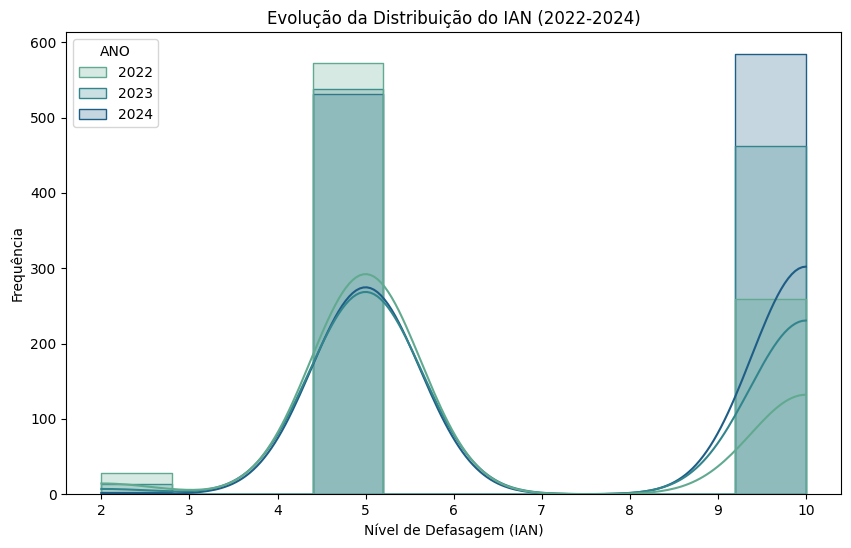

In [101]:
df_dados_ian = df_dados[df_dados['IAN'].notnull()]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_dados_ian , x="IAN", hue="ANO", bins=10, kde=True, 
             palette="crest", element="step")

plt.title("Evolução da Distribuição do IAN (2022-2024)")
plt.xlabel("Nível de Defasagem (IAN)")
plt.ylabel("Frequência")
plt.show()

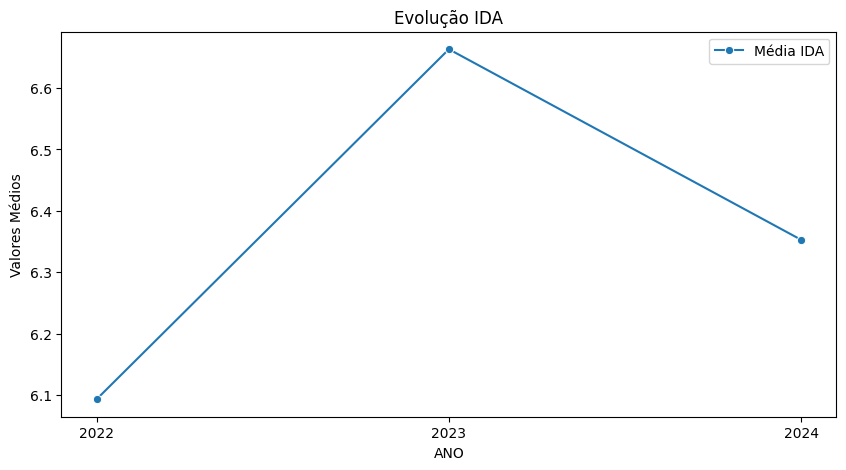

In [102]:
df_dados_ida = df_dados[df_dados['IDA'].notnull()]
df_dados_ida_media = df_dados_ida.groupby('ANO')['IDA'].mean().reset_index()

plt.figure(figsize=(10, 5))

sns.lineplot(data=df_dados_ida_media, x='ANO', y='IDA', label='Média IDA', marker='o')

plt.xticks(df_dados_ida_media['ANO'].unique())
plt.title('Evolução IDA')
plt.ylabel('Valores Médios')
plt.show()